# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 200MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 367MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 192MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 323MB/s]

100%|██████████| 170M/170M [00:01<00:00, 160MB/s]



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 134.2ms
Speed: 0.9ms pre-process, 134.2ms inference, 1196.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


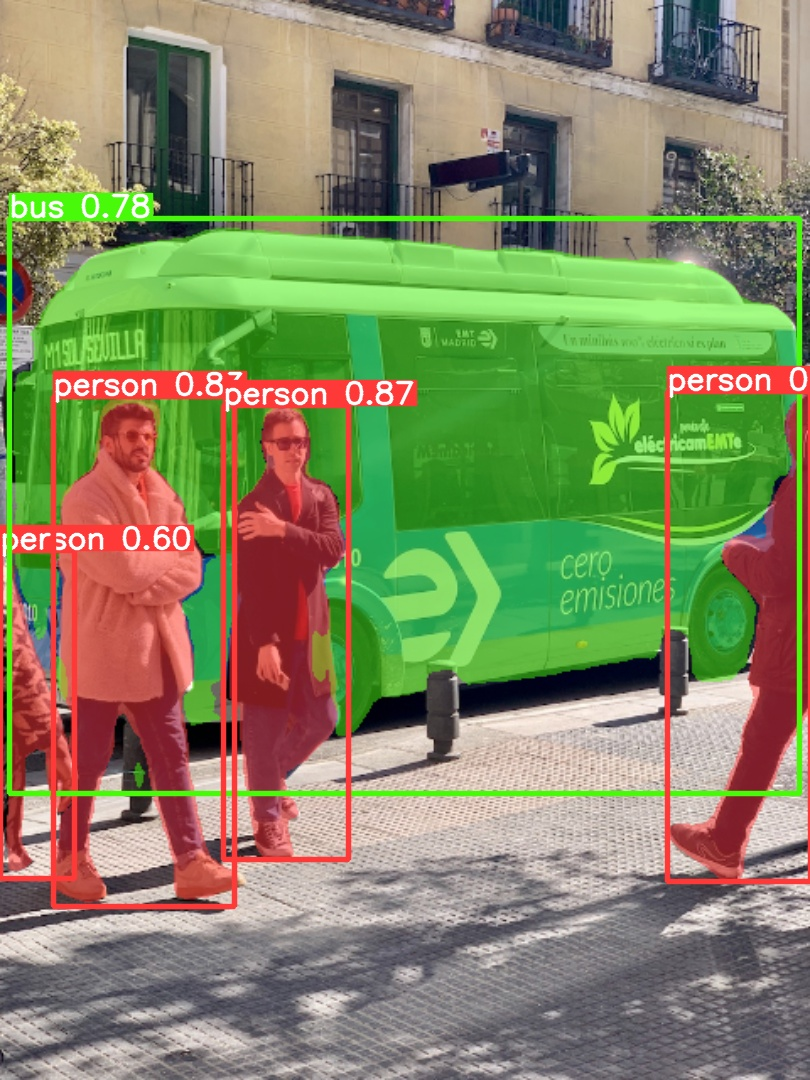

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

**Analysis:**

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests
import time

session = requests.Session()
image_url = "https://www.treehugger.com/thmb/mIDnBoZOKmqQ74EHwi-QDbQBeRM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-1043597638-49acd69677d7442588c1d8930d298a59.jpg"

# Add a delay of 1 second between requests
time.sleep(1)

response = session.get(image_url)
if response.status_code == 200:
    with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
        handler.write(response.content)
else:
    print(f"Failed to download image: {response.status_code}")

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 54.0ms
Speed: 0.5ms pre-process, 54.0ms inference, 592.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


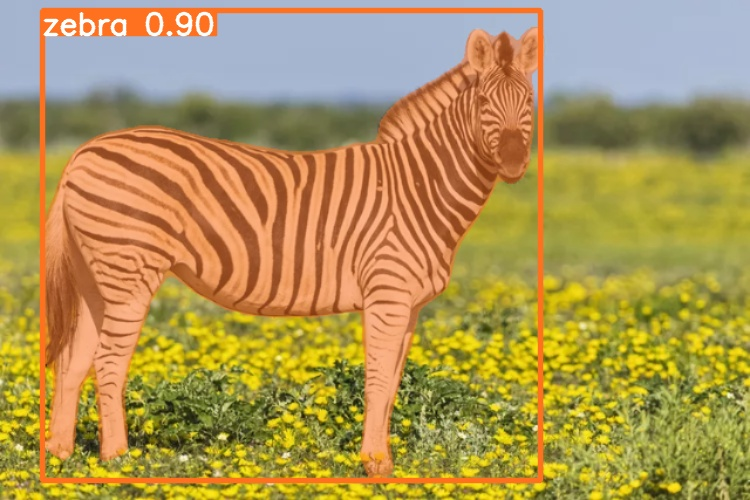

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

**Analysis:**

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 345MB/s]


In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 372MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 370MB/s]
Dataset download success ✅ (1.4s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 951.88it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

**Analysis:**

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1V0Jhart5itO7feAZpBp")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
version = project.version(61)
dataset = version.download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ASL-Poly-Instance-Seg-61 in yolov5pytorch:: 100%|██████████| 5684/5684 [00:01<00:00, 3759.88it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
roboflow:
  license: Private
  project: asl-poly-instance-seg
  url: https://universe.roboflow.com/paul-guerrie-tang1/asl-poly-instance-seg/dataset/61
  version: 61
  workspace: paul-guerrie-tang1
test: ../test/images
train: ASL-Poly-Instance-Seg-61/train/images
val: ASL-Poly-Instance-Seg-61/valid/images


**Analysis:** In this part of procedure activity, the listed above are the labels for the various images included in the dataset of ASL dataset from Roboflow.

### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-04-01 11:35:32.832242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 11:35:32.832489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 11:35:32.947389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, s

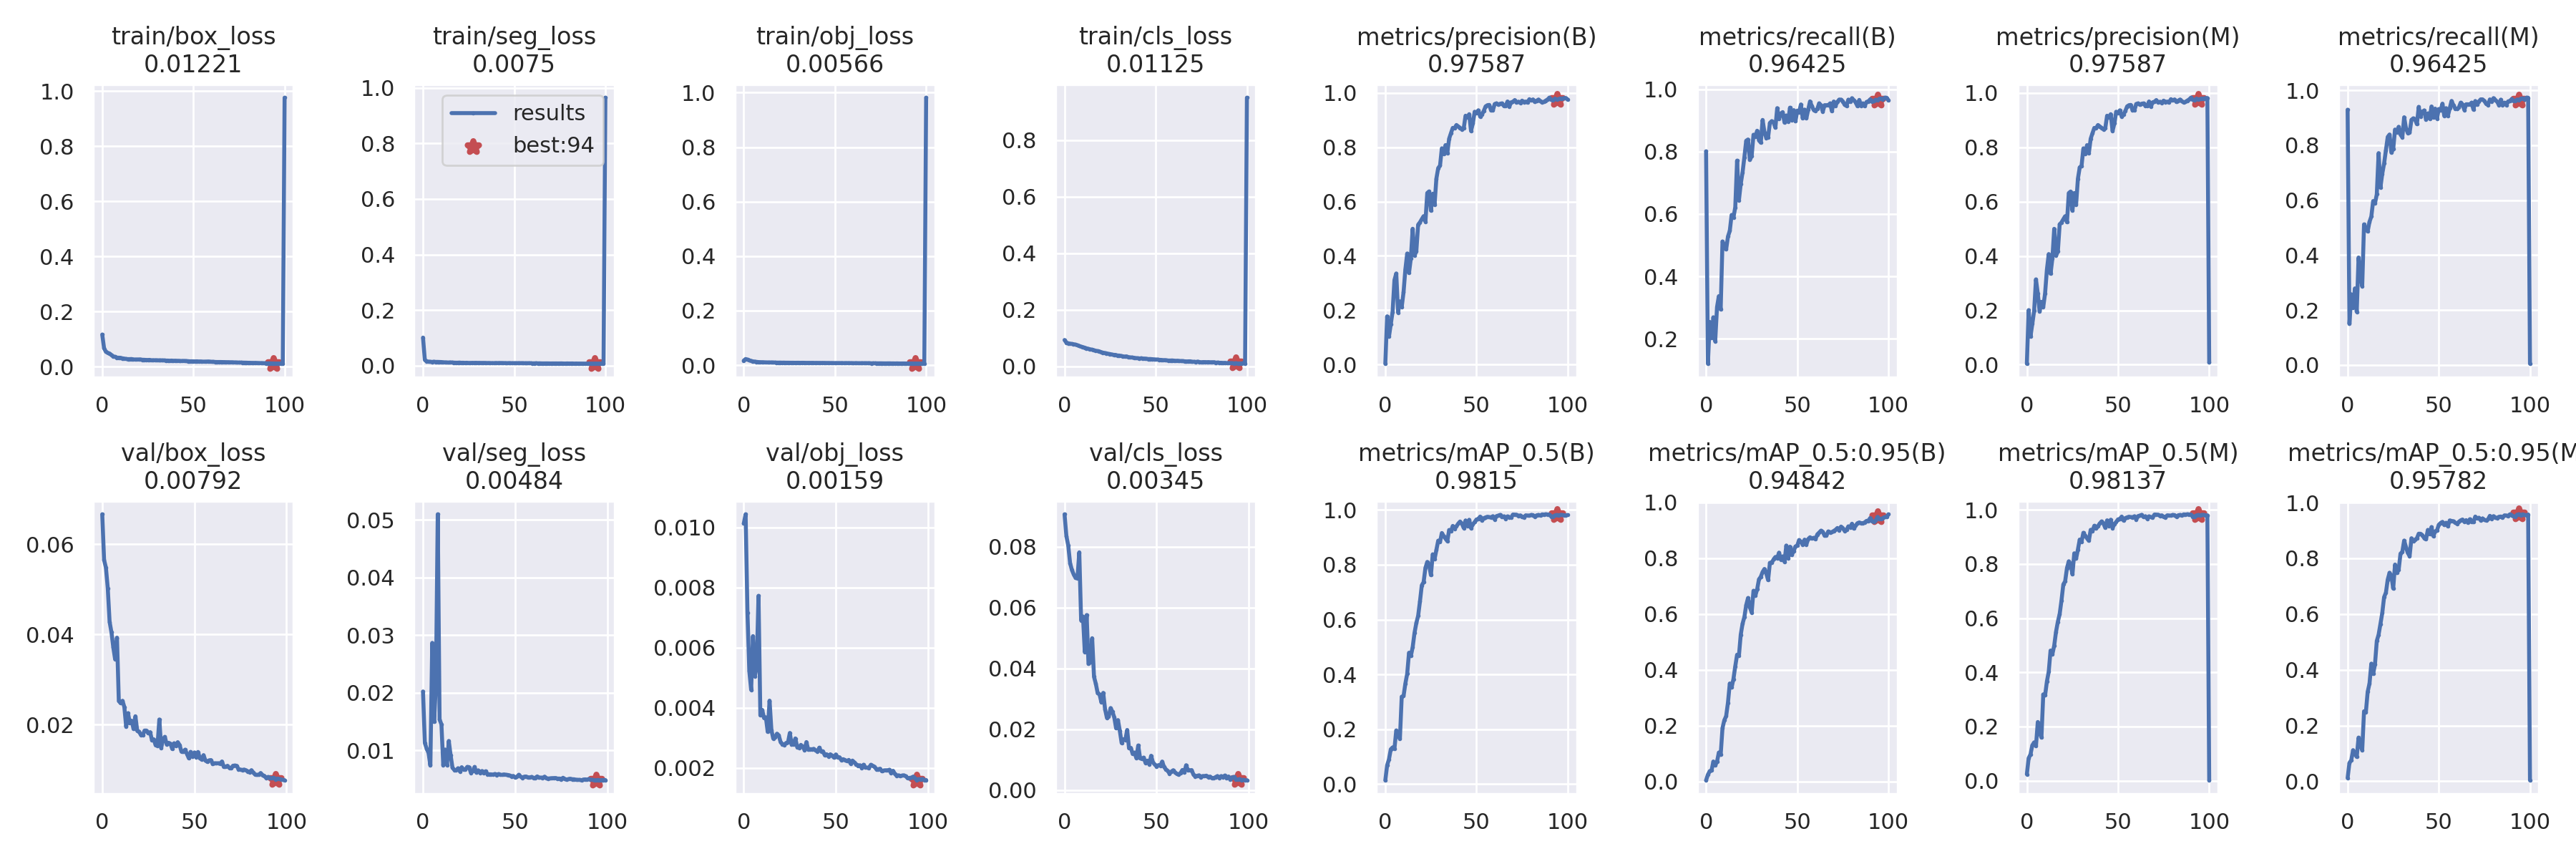

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

**Analysis:** The photo above shows the results of training plots for the sutom trained model. It is the measurement in which shows the model's performance in training the data.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-61/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:08<00:00,  1.27it/s]
                   all        334        335

The image above shows the resulting prediction overlayed on the input image.

**Analysis/Evaluation:** In this section of procedure activity for custom dataset, the model performed well because of the results shown above. Seeing the result of the model's Pixel Accuracy in masking the an instance, most of the labels achived an approximate of 93% and above scores. With these results, the model was able to train and detect instances in the given dataset of images.

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/J29_jpg.rf.e411f754895e3c9a5013adc23a05afbd.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-61/test/images/J29_jpg.rf.e411f754895e3c9a5013adc23a05afbd.jpg: 320x320 1 J, 8.7ms

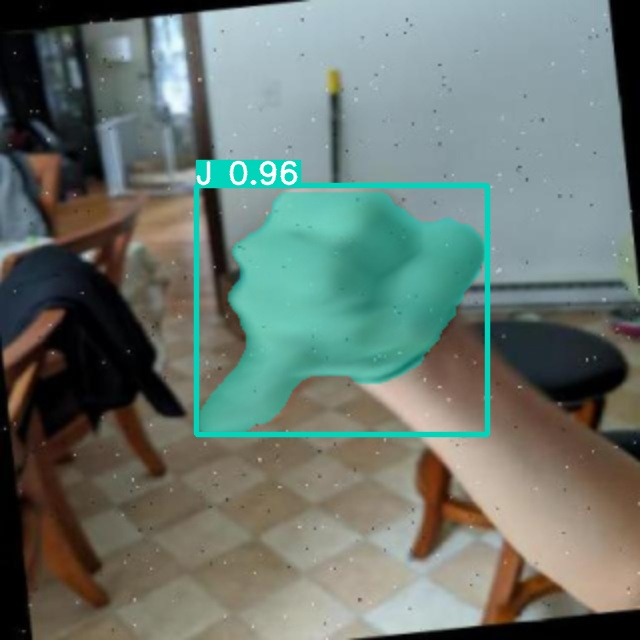

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

**Analysis/Evaluation:** The image above shows the model's segmentation of instance or object present in the image. Based on the image, the bounding box shows a confidence level of 96% which is a good result because it means that the model was able to achieved that high score leading to segmenting properly the instance or objects present in the image. Along with the masking of the instance, the model's perfromance would be able to do better because of the pixel it will process for a more accurate segmentation of the images.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "/content/drive/MyDrive/example_yolov5"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://images2.pics4learning.com/catalog/l/l.jpg",
    "https://www.signingsavvy.com/images/words/alphabet/2/y1.jpg",
    "https://www.signingsavvy.com/images/words/alphabet/2/r1.jpg",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset/weights/best.pt'], source=/content/drive/MyDrive/example_yolov5, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/3 /content/drive/MyDrive/example_yolov5/example_0.jpg: 320x320 1 I, 7.0ms
image 2/3 /content/drive/MyDrive/example_yolov5/example_1.jpg: 320x320 1 Y, 7.5ms
image 3/3 /content/drive/MyDrive/example_yolov5/example_2.jpg: 320x320 1 K, 6.6ms
Speed: 0.3ms pre-process, 7.1ms in

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8
import os

folder_path = "/content/yolov5/runs/predict-seg/exp2/labels"  #

all_files_content = []  #

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            file_content = []  # List to store content of current file
            # Read each line of the file
            for line in file:
                # Split the line into individual elements
                elements = line.strip().split()
                file_content.append(elements)  # Append elements to file content list
            all_files_content.append(file_content)  # Append file content to all files content list

In [ ]:
sample0 = float(all_files_content[0][-1][-1])
sample1 = float(all_files_content[1][-1][-1])
sample2 = float(all_files_content[2][-1][-1])
j= -1

conf = [sample0, sample1, sample2]
for i in conf:
  j += 1
  if i < MIN_CONF_THRESHOLD:
    print(f"Image {j} has a low confidence prediction (confidence: {i}), uploading to project: example_{j}.jpg")
  else:
    print(f"Image {j} has a high confidence prediction (confidence: {i}), uploading to project: example_{j}.jpg")

Image 0 has a high confidence prediction (confidence: 0.874583), uploading to project: example_0.jpg
Image 1 has a low confidence prediction (confidence: 0.78856), uploading to project: example_1.jpg
Image 2 has a low confidence prediction (confidence: 0.407295), uploading to project: example_2.jpg


**Analysis:** The code above shows on how will the model be able to segment data outside its dataset. Through the urls of images present above, the code will collect these images then will create their respective lables and then the training of these data would be followed. Computing the confidence level as well as navigating them in the text files are the things happened resulting to the printed outputs above. The confidence levels of each images were displayed as well as classifying them if they are high or low when compared to the assigned minimum confidence threshold score. The displayed output shows that the model wasn't able to performm well on the images because of the confidence level (2 images have low confidence level) in which the code above displays low confidence on Images 1 and 2.

### **Issues/Problems Encountered During the Procedure Part of the Activity:**

1. Google Colab also has limits in using GPU for processing the codes in the notebook. Thus, it is difficult to properly each code especially they are connected with one another. Running the code in Google Colab is a big problem. that is why I transferred running the notebook to VSCode.

# **Supplementary Activity**

The data below is a different data from roboflow which the dataset has various images which describes different vehicles or road signs that can be found on the road. Using this dataset, instance segmentation is being demonstated as well as the evaluation of the model's performance.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1V0Jhart5itO7feAZpBp")
project = rf.workspace("imageproweek12").project("carauto")
version = project.version(13)
dataset = version.download("yolov5")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CarAuto-13 in yolov5pytorch:: 100%|██████████| 3736/3736 [00:00<00:00, 5368.89it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- bus
- car
- motorcycle
- person
- sign
- traffic cone
- traffic light
- truck
nc: 8
roboflow:
  license: CC BY 4.0
  project: carauto
  url: https://universe.roboflow.com/imageproweek12/carauto/dataset/13
  version: 13
  workspace: imageproweek12
test: ../test/images
train: CarAuto-13/train/images
val: CarAuto-13/valid/images


**Analysis:** In this part of supplementary activity, the listed above are the labels for the various images included in the dataset of car dataset from Roboflow. It is a different dataset which is needed for this part of the activity for the implementation of instance segmentation.

### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights weights/yolov5s-seg.pt --name custom-dataset


/content/yolov5
2024-03-31 23:45:45.782583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 23:45:45.782687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 23:45:45.903638: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=weights/yolov5s-seg.pt, cfg=, data=/content/yolov5/CarAuto-13/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_

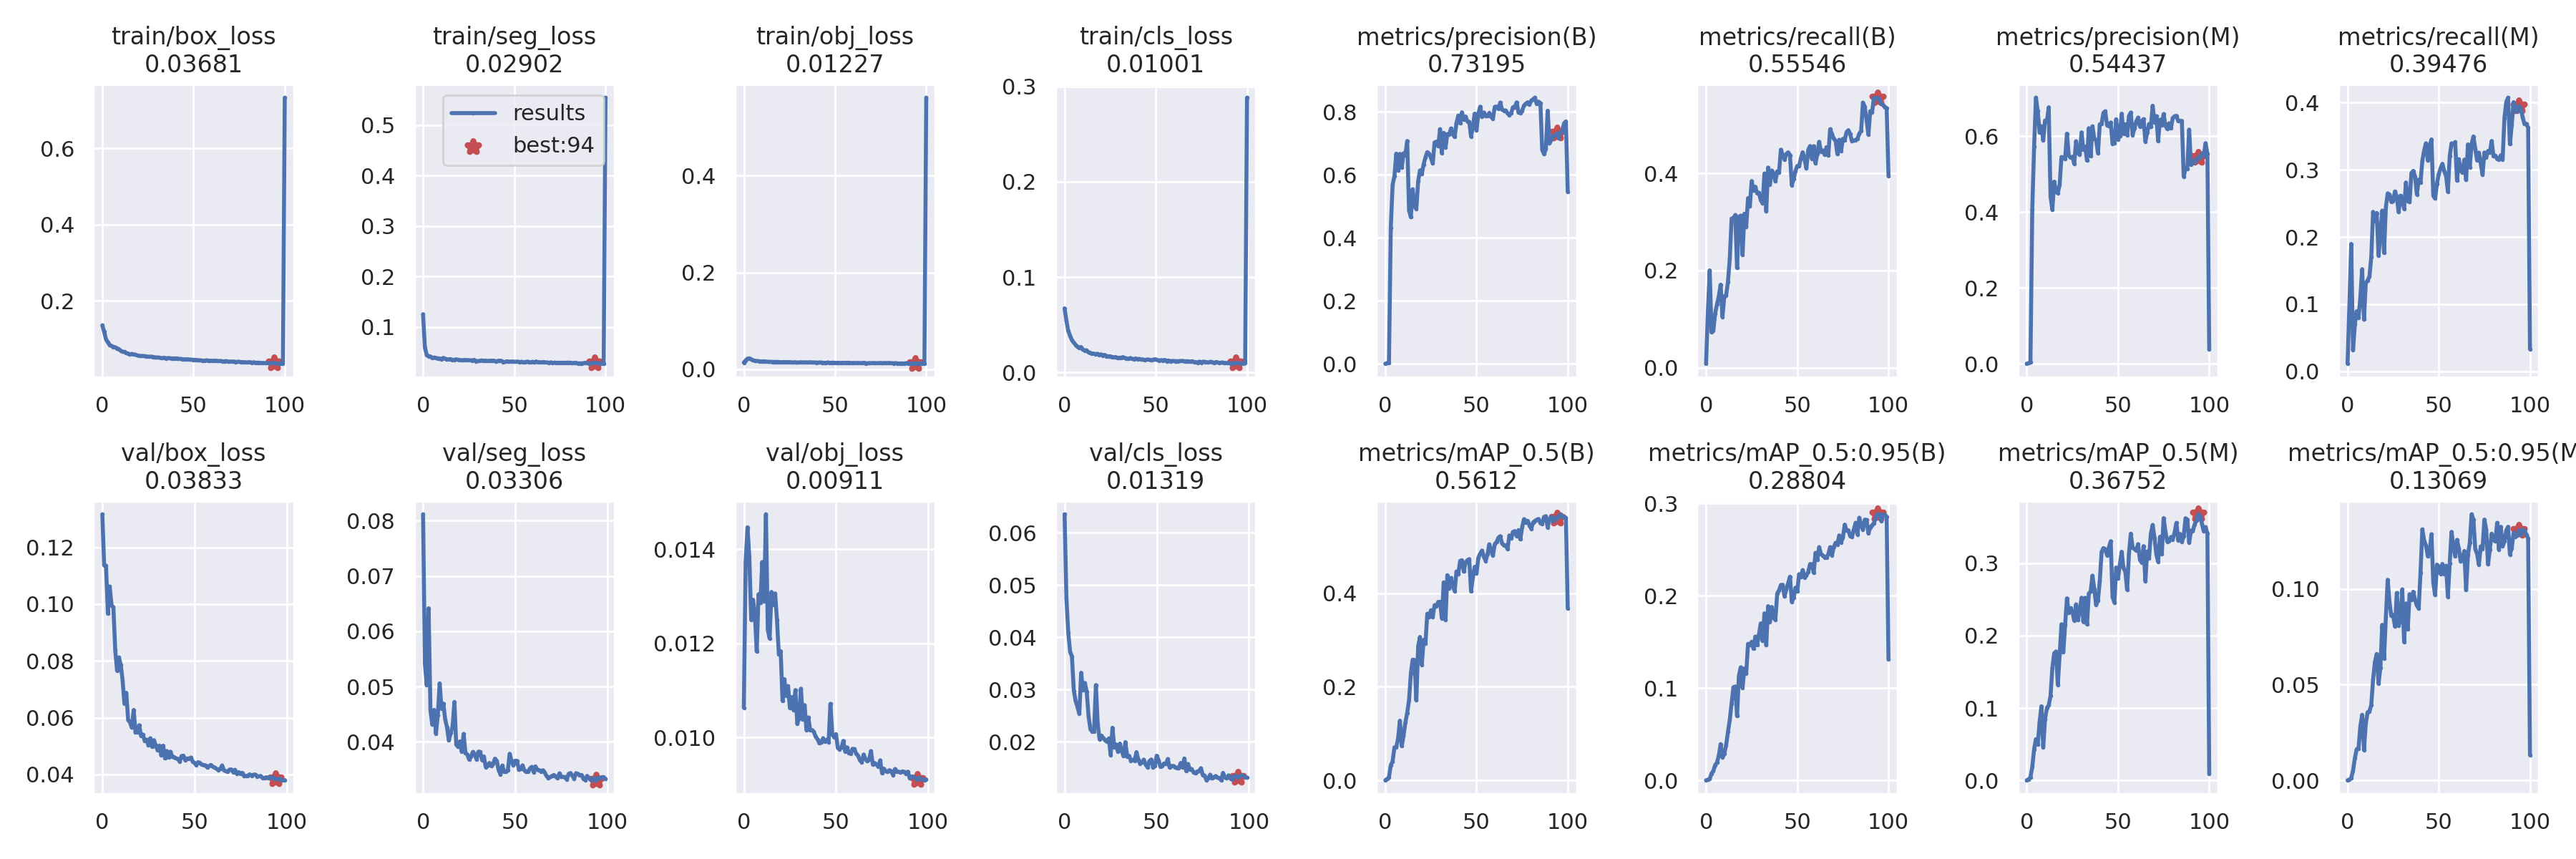

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

**Analysis:** The photo above shows the results of training plots for the sutom trained model. It is the measurement in which shows the model's performance in training the data. Just like the code above, it shows how the model works on these dataset which includes training and processing the data.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/CarAuto-13/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7417301 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/CarAuto-13/valid/labels.cache... 372 images, 13 backgrounds, 0 corrupt: 100% 372/372 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/yolov5/CarAuto-13/valid/images/IMG_4601_MOV-789_jpg.rf.541154f5f3ff16c37130206d315a162d.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mas

**Analysis/Evaluation:** In this section of procedure activity for custom dataset, the model performed well because of the results shown above. Seeing the result of the model's Pixel Accuracy in masking the an instance, most of the labels achived an approximate of 67% as its highest score while 20% would be the lowest one. With these results, the model has poor performance when it comes to training the model as well as perform segmentation on the images. Compared to the dataset above, this dataset achieved low results which may be because of the number of images available in the dataset as well as the queality of images of the dataset used in this supplementary activity.

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/CarAuto-13/test/images/IMG_4601_MOV-844_jpg.rf.46bde7ea4e3a0550b22eeef277aa4dc4.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7417301 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/CarAuto-13/test/images/IMG_4601_MOV-844_jpg.rf.46bde7ea4e3a0550b22eeef277aa4dc4.jpg: 320x320 1 car, 2 mot

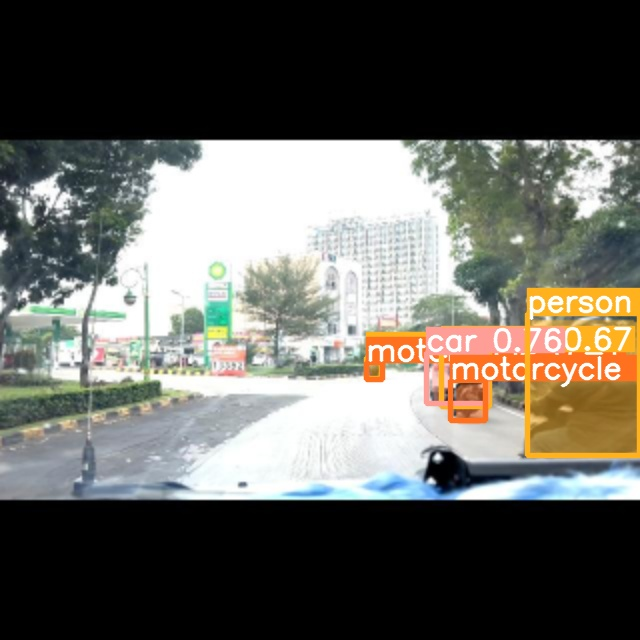

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[5]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

**Analysis/Evaluation:** The image above shows the model's segmentation of instance or object present in the image. Based on the image, the bounding box shows a confidence level of 76% which is not a good result because it means that the model was not able to achieved that high score leading to not properly segmenting the instance or objects present in the image. Even though masking the instances would be an additional factor for firther enhancing the perfromance of the model whe it comes to segmenting instance on images, for this dataset, the model wasn't able to achieved a high score which is evident on the results showed above.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "/content/drive/MyDrive/example_yolov5"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.pinimg.com/736x/4d/12/1c/4d121c907242a667c2c813eebd6e4d1c.jpg",
    "https://as1.ftcdn.net/v2/jpg/01/64/51/38/1000_F_164513878_zh305YU6vgBYtfbftpU3alpx0rAUYX3N.jpg",
    "https://hips.hearstapps.com/roa.h-cdn.co/assets/17/18/1494016371-roa060117fea-ferrari01lead.jpg?crop=1.00xw:0.750xh;0,0.250xh&resize=1200:*",
    ]

time.sleep(1)

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset/weights/best.pt'], source=/content/drive/MyDrive/example_yolov5, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7417301 parameters, 0 gradients, 25.7 GFLOPs
image 1/3 /content/drive/MyDrive/example_yolov5/example_0.jpg: 224x320 1 car, 60.3ms
image 2/3 /content/drive/MyDrive/example_yolov5/example_1.jpg: 224x320 1 car, 12.9ms
image 3/3 /content/drive/MyDrive/example_yolov5/example_2.jpg: 160x320 1 car, 107.8ms
Speed: 0.4ms pre-process

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8
import os

folder_path = "/content/yolov5/runs/predict-seg/exp/labels"  #

all_files_content = []  #

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            file_content = []  # List to store content of current file
            # Read each line of the file
            for line in file:
                # Split the line into individual elements
                elements = line.strip().split()
                file_content.append(elements)  # Append elements to file content list
            all_files_content.append(file_content)  # Append file content to all files content list

In [ ]:
sample0 = float(all_files_content[0][-1][-1])
sample1 = float(all_files_content[1][-1][-1])
sample2 = float(all_files_content[2][-1][-1])
j= -1

conf = [sample0, sample1, sample2]
for i in conf:
  j += 1
  if i < MIN_CONF_THRESHOLD:
    print(f"Image {j} has a low confidence prediction (confidence: {i}), uploading to project: example_{j}.jpg")
  else:
    print(f"Image {j} has a high confidence prediction (confidence: {i}), uploading to project: example_{j}.jpg")

Image 0 has a high confidence prediction (confidence: 0.888389), uploading to project: example_0.jpg
Image 1 has a high confidence prediction (confidence: 0.918519), uploading to project: example_1.jpg
Image 2 has a high confidence prediction (confidence: 0.919175), uploading to project: example_2.jpg


**Analysis:** The code above shows on how will the model be able to segment data outside its dataset. Through the urls of images present above, the code will collect these images then will create their respective lables and then the training of these data would be followed. Computing the confidence level as well as navigating them in the text files are the things happened resulting to the printed outputs above. The confidence levels of each images were displayed as well as classifying them if they are high or low when compared to the assigned minimum confidence threshold score. The displayed output shows that the model was able to perfrom well on the images because of the confidence level it got and if compared to the previous dataset, the model for this dataset was able

### ***Research on evaluation metrics for instance segmentation: How can you evaluate the performance of an instance and semantic segmentation model?***
**Answer:** Just like other methods in neural networks and machine learning, instance and semantic segmentation models also have their own ways to evaluate its performance. For Instance Segmentation it uses Intersection over Union or (IoU) which  measures the pixel-wise overlap between a ground truth mask and a model's prediction, expressed as a percentage or an integer between 0 and 1. And Average Precision or (AP) in which it calculated as the area under the precision-recall curve. It balances the tradeoffs between two metrics, precision and recall, calculated using discrete outcome values like true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). Whereas for Semantic Segmentation it uses Pixel Accuracy which measures the percentage of correctly classified pixels in the image. While it provides a straightforward evaluation metric, it may not be sufficient for imbalanced datasets. And Mean Intersection over Union or (mIoU) which computes the average IoU across all classes. It is a popular metric for evaluating semantic segmentation models as it provides a single score representing overall performance.

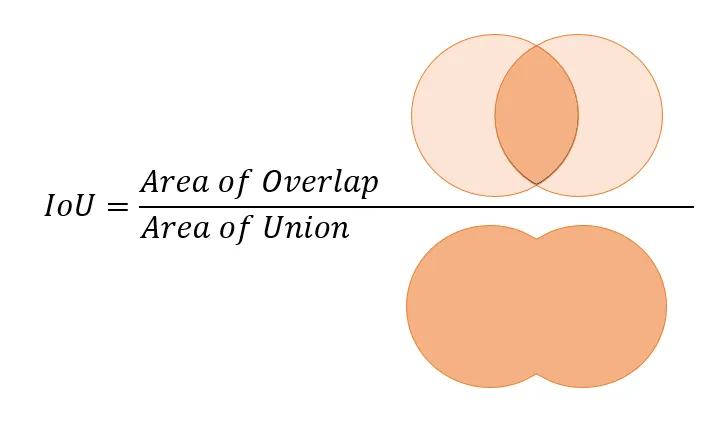
<br> *The above image shows the visual representation of Intersection over Union (IoU).*

**References:**
* What is instance segmentation? | IBM. (n.d.). https://www.ibm.com/topics/instance-segmentation
* Jordan, J. (2018, December 18). Evaluating image segmentation models. Jeremy Jordan. https://www.jeremyjordan.me/evaluating-image-segmentation-models/
* Herdy, S. (2023, December 11). How to Evaluate Semantic Segmantation Models - Stefan Herdy - Medium. Medium. https://medium.com/@stefan.herdy/how-to-evaluate-semantic-segmantation-models-cd2539673701#:~:text=Quantitative%20evaluation%20metrics%20are%20commonly,of%20pixels%20in%20the%20image.

**Image Reference:**
* Herdy, S. (2023, December 11). How to Evaluate Semantic Segmantation Models - Stefan Herdy - Medium. Medium. https://medium.com/@stefan.herdy/how-to-evaluate-semantic-segmantation-models-cd2539673701#:~:text=Quantitative%20evaluation%20metrics%20are%20commonly,of%20pixels%20in%20the%20image.

# **Conclusion**

In this activity we were tasked to implement instance segmentation using YOLOv5. This YOLO algorithm is much more easier to do since it is newer than the YOLOv3 which was used on the previous activity. That is why doing this activity is less challenging compared to the prervious one. Learning the concept of instance segmentation along with semantic segmentation is a big advantage in learning the general concept of computer vision. The models used for this activity shows a good performance because it still able to segment images even tough they show a poor results in evalution of their perfromance. This may be bevause of the data itself and the quality of images included. Also, there are some issues that have been encountered but despite all of that, I was able to finish this activity and learn something in regards to the focused topic. Overall, using YOLO algotithm in the application of computer vision is a new horizon for us because it will bring new knoeledge which we can use for our future innovations as aspiring professionals in the field of technology.

### ***“I affirm that I have not given or received any unauthorized help on this exam, and that this work is my own.”***

**Google Colab Link:** https://colab.research.google.com/drive/1p0bko2KbuYy76Hgl4VEHDFFjeXz3Tm5s?usp=sharing